In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset 2.csv')

# EDA / Feature Engineering

In [3]:
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

In [5]:
# Drop irrelevant features

df.drop(['FIRST_PAYMENT_DATE', 'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_INTEREST_RATE', 'CHANNEL', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PRODUCT_TYPE', 'PROPERTY_STATE', 'POSTAL_CODE', 'LOAN_SEQUENCE_NUMBER', 'SELLER_NAME', 'SERVICER_NAME', 'PREPAID'], axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CREDIT_SCORE                   497426 non-null  float64
 1   FIRST_TIME_HOMEBUYER_FLAG      369578 non-null  object 
 2   OCCUPANCY_STATUS               500137 non-null  object 
 3   ORIGINAL_DEBT_TO_INCOME_RATIO  485208 non-null  float64
 4   ORIGINAL_UPB                   500137 non-null  int64  
 5   PROPERTY_TYPE                  500042 non-null  object 
 6   LOAN_PURPOSE                   500137 non-null  object 
 7   ORIGINAL_LOAN_TERM             500137 non-null  int64  
 8   NUMBER_OF_BORROWERS            499890 non-null  float64
 9   DELINQUENT                     500137 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 34.8+ MB


In [7]:
# rename columns to increase readability
df.columns = ['FICO',
              'First Time Homebuyer', 
              'Occupancy Status', 
              'DTI',
              'UPB',
              'Property Type',
              'Loan Purpose',
              'Loan Term',
              'Number of Borrowers',
              'Delinquent']

[Text(0, 0, '482146'), Text(0, 0, '17991')]

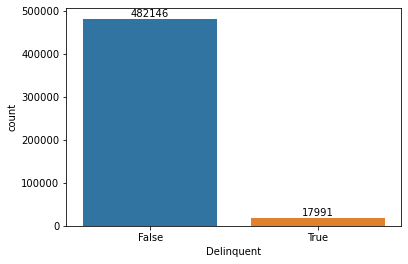

In [8]:
ax = sns.countplot(x = 'Delinquent', data = df)
ax.bar_label(ax.containers[0])

In [9]:
df['Delinquent'] = df['Delinquent'].apply(lambda x: 1 if x == True else 0)

In [10]:
df['FICO'].describe()

count    497426.000000
mean        712.536212
std          54.791262
min         300.000000
25%         676.000000
50%         719.000000
75%         756.000000
max         839.000000
Name: FICO, dtype: float64

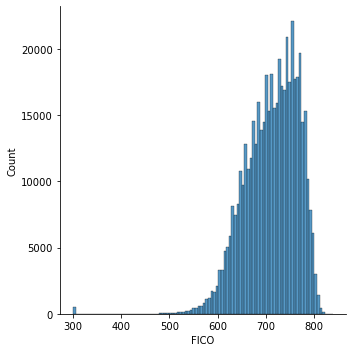

In [11]:
sns.displot(df['FICO'], bins = 100)

In [12]:
# Number of bad credit borrowers
sum(df['FICO'] < 630)

35988

In [13]:
# Percent of bad credit borrowers
print(str(round(sum(df['FICO'] < 630)*100 / len(df), 2)) + ' %')

7.2 %


[Text(0, 0, '31295'), Text(0, 0, '4693')]

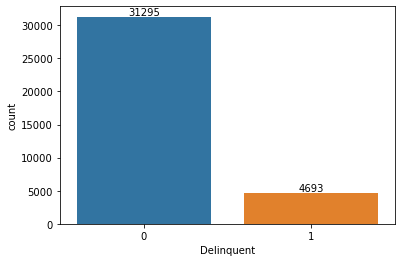

In [14]:
# Checking Delinquency Rates Among Bad Credit Borrowers
ax = sns.countplot(x = 'Delinquent', data = df[df['FICO'] < 630])
ax.bar_label(ax.containers[0])

In [15]:
# Pretty High Delinquency Rate for Bad Credit Borrowers
print(str(round((sum((df['FICO'] < 630) & (df['Delinquent'] == 1)) / sum((df['FICO'] < 630) & (df['Delinquent'] == 0)))*100)) + ' %')

15 %


In [16]:
for i in df[df['FICO'] == 0]['Delinquent'].index:
    df.iloc[i]['Delinquent'] == 1

[Text(0, 0, '320418'), Text(0, 0, '49160')]

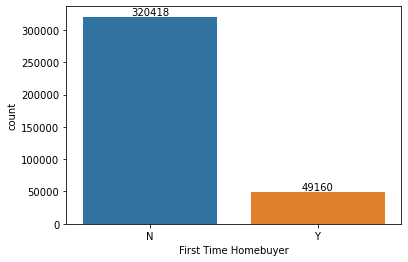

In [17]:
ax = sns.countplot(x = 'First Time Homebuyer', data = df)
ax.bar_label(ax.containers[0])

In [18]:
df['First Time Homebuyer'] = df['First Time Homebuyer'].apply(lambda x: 1 if x == 'Y' else 0)

[Text(0, 0, '465817'), Text(0, 0, '14211'), Text(0, 0, '20109')]

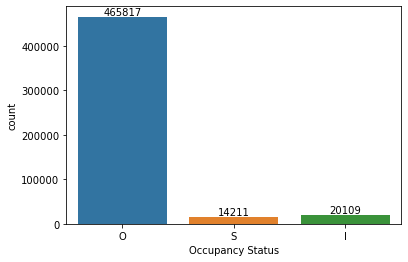

In [19]:
ax = sns.countplot(x = 'Occupancy Status', data = df)
ax.bar_label(ax.containers[0])

In [20]:
occupancy = pd.get_dummies(df['Occupancy Status'])
occupancy.columns = ['Investment Property', 'Primary Residence', 'Secondary Residence']

In [21]:
df['DTI'].describe()

count    485208.000000
mean         32.917541
std          11.111800
min           1.000000
25%          25.000000
50%          33.000000
75%          41.000000
max          65.000000
Name: DTI, dtype: float64

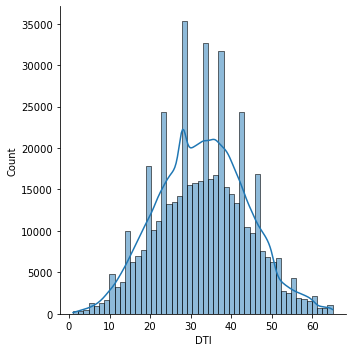

In [22]:
sns.displot(df['DTI'], bins = 50, kde = True)

In [23]:
df['UPB'].describe()

count    500137.000000
mean     136493.484785
std       60968.743066
min        8000.000000
25%       89000.000000
50%      126000.000000
75%      176000.000000
max      578000.000000
Name: UPB, dtype: float64

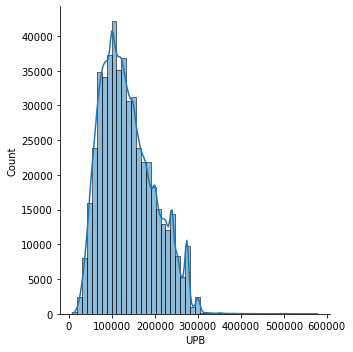

In [24]:
sns.displot(df['UPB'], bins = 50, kde = True)

[Text(0, 0, '410630'),
 Text(0, 0, '53455'),
 Text(0, 0, '33639'),
 Text(0, 0, '1741'),
 Text(0, 0, '197'),
 Text(0, 0, '380')]

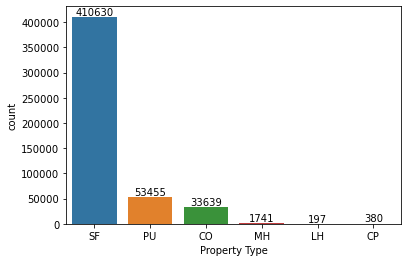

In [25]:
ax = sns.countplot(x = 'Property Type', data = df)
ax.bar_label(ax.containers[0])

In [26]:
property_type = pd.get_dummies(df['Property Type'])
property_type.drop(['LH', 'CP'], axis = 1, inplace = True)
property_type.columns = ['Condo', 'Manufactured Housing', 'Planned Unit Development', 'Single-Family']

[Text(0, 0, '214791'), Text(0, 0, '174293'), Text(0, 0, '111053')]

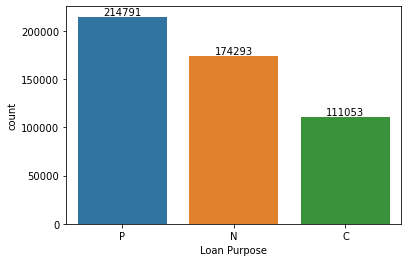

In [27]:
ax = sns.countplot(x = 'Loan Purpose', data = df)
ax.bar_label(ax.containers[0])

In [28]:
loan_purpose = pd.get_dummies(df['Loan Purpose'])
loan_purpose.columns = ['Refinance - Cash Out', 'Refinance - No Cash Out', 'Purchase']

In [29]:
df['Loan Term'].value_counts()

360    495446
354       607
348       405
349       282
336       209
        ...  
319         6
361         6
304         5
303         4
362         1
Name: Loan Term, Length: 62, dtype: int64

In [30]:
df['Loan Term'] = df['Loan Term'].apply(lambda x: 1 if x == 360 else 0)

[Text(0, 0, '184812'), Text(0, 0, '315078')]

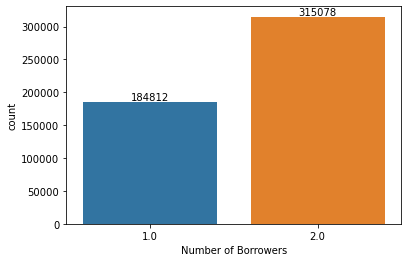

In [31]:
# 1 if 1 borrower; else >1 applicant
ax = sns.countplot(x = 'Number of Borrowers', data = df)
ax.bar_label(ax.containers[0])

In [32]:
df = pd.concat([df, occupancy, property_type, loan_purpose], axis = 1)

In [33]:
df.drop(['Occupancy Status', 'Property Type', 'Loan Purpose'], axis = 1, inplace = True)

<AxesSubplot:>

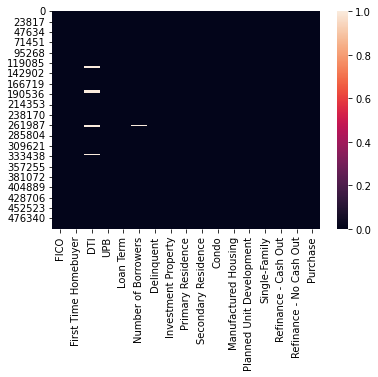

In [34]:
sns.heatmap(df.isnull())

## Final Preparation

In [35]:
sample = df
sample.dropna(inplace = True)

[Text(0, 0, '465037'), Text(0, 0, '17443')]

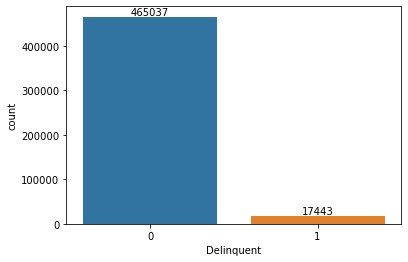

In [36]:
ax = sns.countplot(x = 'Delinquent', data = sample)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

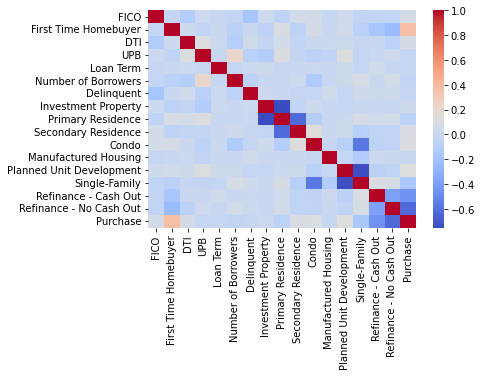

In [37]:
sns.heatmap(sample.corr(), cmap = 'coolwarm')

In [38]:
# done the first time; can import sample for future references
# sub1 = sample[sample['Delinquent'] == 0].sample(n = 17000)
# sub2 = sample[sample['Delinquent'] == 1].sample(n = 17000)
# sample = pd.concat([sub1, sub2])
# sample.reset_index(inplace = True)
# sample.drop('index', axis = 1, inplace = True)
# sample.to_csv('Cleaned Data 2')

In [39]:
sample = pd.read_csv('Cleaned Data 2')
sample.drop('Unnamed: 0', axis = 1, inplace = True)

In [40]:
scaler = MinMaxScaler()

In [41]:
scaled_features = scaler.fit_transform(sample.drop('Delinquent', axis = 1))

## Model

In [42]:
X = scaled_features #sample.drop('Delinquent', axis = 1)
y = sample['Delinquent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
model = LogisticRegression(max_iter = 1000)

In [45]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
# Manual Coefficient Selection (based on prior tests) 
model.coef_ = np.array([[-9.57776116e+00, -6.84570883e-02,  1.06148006e+00, -3.05934753e+00,  8.97068608e-01, -7.74302081e-01, 2.65133660e-01, -1.02757117e-01, -1.56238705e-01, -3.91634695e-01,  1.43808361e+00, -2.70657859e-02, 2.56514945e-01, -2.85111041e-04,  4.94913571e-02, -4.30684080e-02]])

In [51]:
pred = model.predict(X_test)

In [52]:
print(confusion_matrix(y_test, pred))

[[3029 1184]
 [1103 3184]]


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      4213
           1       0.73      0.74      0.74      4287

    accuracy                           0.73      8500
   macro avg       0.73      0.73      0.73      8500
weighted avg       0.73      0.73      0.73      8500

